**Course:** CSIT553_03SP24 EXPLORATORY DATA ANALYSIS & VISUALIZATION

**Student:** Shibbir Ahmed Arif

**Project Group:** 08

# **Decoding the Impact: A Deep Dive into COVID-19 Death Trends in the USA**

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Description**

This is a daily reports based CSSE COVID-19 dataset published by John Hopkins University. This dataset contains daily death cases records between 2020 - 2023.

**Data Source:** https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports_us

**Field Description**

**UID:** Unique Identifier for each row entry.

**ISO2 and ISO3:** represents country name and accronym.

**Code3:** Officially assigned country code identifiers.

**FIPS:** US only. Federal Information Processing Standards code that uniquely identifies counties within the USA.

**Admin2:** County name. US only.

**Province_State:** Province, state or dependency name.

**Country_Region:** Country, region or sovereignty name.

**Lat:** - Latitude.

**Long_:** Longitude.

**Combined_Key:** represents County, State, Country

**Population:** people lived in a certain county of a specific state of US

# **Steps**

- Data Collection
- Import Necessary Libraries
- Data Load
- Data Exploration
- Data Cleaning
- Data Analysis
- Map Visualization
- Aggregation Visualization
- Interactive Visualization
- Conclusion

In [ ]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 10
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import re
from folium.plugins import FastMarkerCluster
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# **Load The Data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/time_series_covid19_deaths_US.csv")
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/2023,3/1/2023,3/2/2023,3/3/2023,3/4/2023,3/5/2023,3/6/2023,3/7/2023,3/8/2023,3/9/2023
0,84001001,US,USA,840,1001.00,Autauga,Alabama,US,32.54,-86.64,...,230,232,232,232,232,232,232,232,232,232
1,84001003,US,USA,840,1003.00,Baldwin,Alabama,US,30.73,-87.72,...,724,726,726,726,726,726,726,726,727,727
2,84001005,US,USA,840,1005.00,Barbour,Alabama,US,31.87,-85.39,...,103,103,103,103,103,103,103,103,103,103
3,84001007,US,USA,840,1007.00,Bibb,Alabama,US,33.00,-87.13,...,109,109,109,109,109,109,109,109,109,109
4,84001009,US,USA,840,1009.00,Blount,Alabama,US,33.98,-86.57,...,261,261,261,261,261,261,261,261,261,261


# **Data Exploration**

In [ ]:
df.shape

(3342, 1155)

In [ ]:
# Get the list of column names
columns = df.columns.tolist()
print("Column names:", columns)

Column names: ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population', '1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020', '1/27/2020', '1/28/2020', '1/29/2020', '1/30/2020', '1/31/2020', '2/1/2020', '2/2/2020', '2/3/2020', '2/4/2020', '2/5/2020', '2/6/2020', '2/7/2020', '2/8/2020', '2/9/2020', '2/10/2020', '2/11/2020', '2/12/2020', '2/13/2020', '2/14/2020', '2/15/2020', '2/16/2020', '2/17/2020', '2/18/2020', '2/19/2020', '2/20/2020', '2/21/2020', '2/22/2020', '2/23/2020', '2/24/2020', '2/25/2020', '2/26/2020', '2/27/2020', '2/28/2020', '2/29/2020', '3/1/2020', '3/2/2020', '3/3/2020', '3/4/2020', '3/5/2020', '3/6/2020', '3/7/2020', '3/8/2020', '3/9/2020', '3/10/2020', '3/11/2020', '3/12/2020', '3/13/2020', '3/14/2020', '3/15/2020', '3/16/2020', '3/17/2020', '3/18/2020', '3/19/2020', '3/20/2020', '3/21/2020', '3/22/2020', '3/23/2020', '3/24/2020', '3/25/2020', '3/26/2020', '3/27/2020', '3/28/2020', 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Columns: 1155 entries, UID to 3/9/2023
dtypes: float64(3), int64(1146), object(6)
memory usage: 29.4+ MB


**Checking Missing Values**

In [ ]:
df.isnull().sum()

UID          0
iso2         0
iso3         0
code3        0
FIPS        10
            ..
3/5/2023     0
3/6/2023     0
3/7/2023     0
3/8/2023     0
3/9/2023     0
Length: 1155, dtype: int64

**Checking Duplicate Values**

In [ ]:
df.duplicated().any()

False

As we can see the output is False, meaning there is no duplicate data in the dataset

# **Data Cleaning**

In [ ]:
# Drop unnecessary columns from the DataFrame
columns_to_drop = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Country_Region', 'Combined_Key']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df

,Admin2,Province_State,Lat,Long_,Population,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,2/28/2023,3/1/2023,3/2/2023,3/3/2023,3/4/2023,3/5/2023,3/6/2023,3/7/2023,3/8/2023,3/9/2023
0,Autauga,Alabama,32.54,-86.64,55869,0,0,0,0,0,...,230,232,232,232,232,232,232,232,232,232
1,Baldwin,Alabama,30.73,-87.72,223234,0,0,0,0,0,...,724,726,726,726,726,726,726,726,727,727
2,Barbour,Alabama,31.87,-85.39,24686,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103
3,Bibb,Alabama,33.00,-87.13,22394,0,0,0,0,0,...,109,109,109,109,109,109,109,109,109,109
4,Blount,Alabama,33.98,-86.57,57826,0,0,0,0,0,...,261,261,261,261,261,261,261,261,261,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Teton,Wyoming,43.94,-110.59,23464,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,16
3338,Uinta,Wyoming,41.29,-110.55,20226,0,0,0,0,0,...,43,43,43,43,43,43,43,43,43,43
3339,Unassigned,Wyoming,0.00,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3340,Washakie,Wyoming,43.90,-107.68,7805,0,0,0,0,0,...,50,50,50,50,50,50,50,51,51,51


In [ ]:
df.rename(columns={'Admin2': 'County', 'Province_State': 'State'}, inplace=True)
df

,County,State,Lat,Long_,Population,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,2/28/2023,3/1/2023,3/2/2023,3/3/2023,3/4/2023,3/5/2023,3/6/2023,3/7/2023,3/8/2023,3/9/2023
0,Autauga,Alabama,32.54,-86.64,55869,0,0,0,0,0,...,230,232,232,232,232,232,232,232,232,232
1,Baldwin,Alabama,30.73,-87.72,223234,0,0,0,0,0,...,724,726,726,726,726,726,726,726,727,727
2,Barbour,Alabama,31.87,-85.39,24686,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103
3,Bibb,Alabama,33.00,-87.13,22394,0,0,0,0,0,...,109,109,109,109,109,109,109,109,109,109
4,Blount,Alabama,33.98,-86.57,57826,0,0,0,0,0,...,261,261,261,261,261,261,261,261,261,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Teton,Wyoming,43.94,-110.59,23464,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,16
3338,Uinta,Wyoming,41.29,-110.55,20226,0,0,0,0,0,...,43,43,43,43,43,43,43,43,43,43
3339,Unassigned,Wyoming,0.00,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3340,Washakie,Wyoming,43.90,-107.68,7805,0,0,0,0,0,...,50,50,50,50,50,50,50,51,51,51


In [ ]:
df.isnull().sum()

County        6
State         0
Lat           0
Long_         0
Population    0
             ..
3/5/2023      0
3/6/2023      0
3/7/2023      0
3/8/2023      0
3/9/2023      0
Length: 1148, dtype: int64

In [ ]:
df = df.dropna(axis=0)
df

,County,State,Lat,Long_,Population,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,2/28/2023,3/1/2023,3/2/2023,3/3/2023,3/4/2023,3/5/2023,3/6/2023,3/7/2023,3/8/2023,3/9/2023
0,Autauga,Alabama,32.54,-86.64,55869,0,0,0,0,0,...,230,232,232,232,232,232,232,232,232,232
1,Baldwin,Alabama,30.73,-87.72,223234,0,0,0,0,0,...,724,726,726,726,726,726,726,726,727,727
2,Barbour,Alabama,31.87,-85.39,24686,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103
3,Bibb,Alabama,33.00,-87.13,22394,0,0,0,0,0,...,109,109,109,109,109,109,109,109,109,109
4,Blount,Alabama,33.98,-86.57,57826,0,0,0,0,0,...,261,261,261,261,261,261,261,261,261,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Teton,Wyoming,43.94,-110.59,23464,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,16
3338,Uinta,Wyoming,41.29,-110.55,20226,0,0,0,0,0,...,43,43,43,43,43,43,43,43,43,43
3339,Unassigned,Wyoming,0.00,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3340,Washakie,Wyoming,43.90,-107.68,7805,0,0,0,0,0,...,50,50,50,50,50,50,50,51,51,51


# **Data Wrangling**

Its a data manipulation techniques. Doing this, we will add new columns to the dataset for the analysis

In [ ]:
date_columns = [col for col in df.columns if col not in ['County', 'State', 'Lat', 'Long_', 'Population']]

# Parse the existing date columns into datetime format
df[date_columns] = df[date_columns].apply(pd.to_numeric, errors='coerce')

# Convert the index to a DateTimeIndex
df.index = pd.to_datetime(df.index)

# Create new columns for each desired year and sum the values from the respective date columns
df['2020'] = df[date_columns].apply(lambda row: row[pd.to_datetime(row.index).year == 2020].sum(), axis=1)
df['2021'] = df[date_columns].apply(lambda row: row[pd.to_datetime(row.index).year == 2021].sum(), axis=1)
df['2022'] = df[date_columns].apply(lambda row: row[pd.to_datetime(row.index).year == 2022].sum(), axis=1)
df['2023'] = df[date_columns].apply(lambda row: row[pd.to_datetime(row.index).year == 2023].sum(), axis=1)

# Drop the original date columns since we have aggregated the data by year
df.drop(columns=date_columns, inplace=True)

# Reset the index to remove the datetime index
df.reset_index(drop=True, inplace=True)

# Now, df contains the aggregated COVID-19 data for each year in new columns
df

,County,State,Lat,Long_,Population,2020,2021,2022,2023
0,Autauga,Alabama,32.54,-86.64,55869,5589,41785,77553,15658
1,Baldwin,Alabama,30.73,-87.72,223234,12271,136367,248554,49146
2,Barbour,Alabama,31.87,-85.39,24686,2035,22337,35688,7004
3,Bibb,Alabama,33.00,-87.13,22394,2632,25347,37884,7395
4,Blount,Alabama,33.98,-86.57,57826,3855,52469,88287,17738
...,...,...,...,...,...,...,...,...,...
3331,Teton,Wyoming,43.94,-110.59,23464,185,3809,5764,1088
3332,Uinta,Wyoming,41.29,-110.55,20226,443,6213,14378,2924
3333,Unassigned,Wyoming,0.00,0.00,0,2669,14,18,0
3334,Washakie,Wyoming,43.90,-107.68,7805,945,10166,16299,3292


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3336 entries, 0 to 3335
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   County      3336 non-null   object 
 1   State       3336 non-null   object 
 2   Lat         3336 non-null   float64
 3   Long_       3336 non-null   float64
 4   Population  3336 non-null   int64  
 5   2020        3336 non-null   int64  
 6   2021        3336 non-null   int64  
 7   2022        3336 non-null   int64  
 8   2023        3336 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 234.7+ KB


# **Descriptive Statistics**

In [ ]:
# Set pandas display options to show full floating-point numbers without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df.describe()

,Lat,Long_,Population,2020,2021,2022,2023
count,3336.00,3336.00,3336.00,3336.00,3336.00,3336.00,3336.00
mean,36.78,-88.82,99668.12,14027.56,66962.96,110289.98,22610.50
std,8.98,20.87,324444.64,73788.97,255488.90,366427.36,74516.40
min,0.00,-174.16,0.00,0.00,0.00,-156.00,0.00
25%,33.92,-97.81,9917.75,454.00,6380.00,12525.00,2590.75
50%,38.02,-89.50,24848.50,1788.50,17959.50,33382.50,6858.50
75%,41.59,-82.33,64967.75,5840.50,43415.00,81425.25,16590.25
max,69.31,0.00,10039107.00,1836989.00,8624287.00,11766936.00,2390574.00


# **Correlation Matrix**

In [ ]:
# Calculate correlation matrix for the numeric columns
correlation_matrix = df[['2020', '2021', '2022', '2023']].corr()

correlation_matrix

,2020,2021,2022,2023
2020,1.00,0.85,0.83,0.83
2021,0.85,1.00,0.98,0.97
2022,0.83,0.98,1.00,1.00
2023,0.83,0.97,1.00,1.00


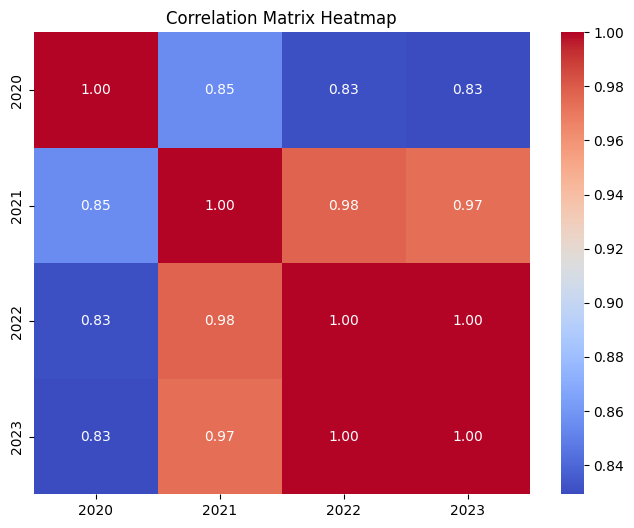

In [ ]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Overall, the correlation matrix suggests that the values of these years are highly correlated with each other, indicating consistent trends or patterns across the years in the dataset.

# **Interactive Map Visualization 1**

**Bubble Map**

**Question: How do COVID-19 death counts vary across different counties in the USA in 2021?**

In [ ]:
import plotly.express as px

# Create a bubble map
fig_bubble = px.scatter_geo(df,
                            lat='Lat',
                            lon='Long_',
                            hover_name='County',
                            size='2021',
                            color='2021',
                            color_continuous_scale=px.colors.sequential.Plasma,
                            size_max=50,
                            scope='usa',
                            title='COVID-19 Death Counts by County in the USA (2021)'
                           )

fig_bubble.update_layout(
    clickmode='event+select',
    title_x=0.5,
    margin=dict(t=50)
)

fig_bubble.show()

Each county is represented by a bubble on the map, where the size and color of the bubble indicate the death count for that county. This visualization provides a clear understanding of the distribution of COVID-19 fatalities across different counties in the USA during the year 2021.

# **Interactive Aggregation Visualization 1**

**Continuous Scatterplot**

**Question: How many people died in 2020 in each state?**

In [ ]:
def sum_deaths(x):
    return x.sum()

state_agg = df.groupby('State')['2020'].agg(sum_deaths).reset_index()

print(state_agg)

            State     2020
0         Alabama   526355
1          Alaska    14154
2         Arizona  1048180
3        Arkansas   285855
4      California  3047844
..            ...      ...
47       Virginia   669104
48     Washington   487621
49  West Virginia    84281
50      Wisconsin   425341
51        Wyoming    20807

[52 rows x 2 columns]


In [ ]:
fig = px.scatter(state_agg,
                 x='2020',
                 y='State',
                 color='State',
                 labels={'2020': 'Total Deaths', 'State': 'State'},
                 title='Total Number of Deaths in 2020 per State',
                 hover_name='State'
                )

fig.update_layout(
    clickmode='event+select',
    xaxis=dict(title='Total Deaths'),
    yaxis=dict(title='State'),
    title_x=0.5,
    margin=dict(t=50)
)

fig.show()

from this figure, we see that most number of people died in 2020 in the state of New York, New Jersey, California and Texas.

# **Aggregation Visualization 2**

**Question: What is the average number of COVID-19 deaths cases per US State in 2022?**

In [ ]:
def avg_deaths(x):
    return x.mean()

# Aggregate by state based on county-level data
state_avg_deaths = df.groupby('State')['2022'].agg(avg_deaths).reset_index()

fig = px.bar(state_avg_deaths,
             x='State',
             y='2022',
             color='2022',
             color_continuous_scale='Viridis',
             labels={'2022': 'Average Deaths', 'State': 'State'},
             title='Average Number of COVID-19 Death Cases by State in 2022'
            )

fig.update_layout(
    xaxis_title='State',
    yaxis_title='Average Deaths',
    xaxis_tickangle=-90,
    xaxis=dict(categoryorder='total descending'),
    title_x=0.5,
    margin=dict(t=50)
)

fig.show()

From the figure, we see that the highest average number of COVID-19 deaths cases in 2022 are in the state of Arizona, California, New Jersey.

# **Interactive Visualization 3**

**Histogram**

In [ ]:
import plotly.graph_objs as go

histogram_traces = {}

# Create histogram traces for each state
for state in state_avg_deaths['State']:
    histogram_traces[state] = go.Histogram(x=df[df['State'] == state]['2022'], name=state, opacity=1)

layout = go.Layout(
    title=dict(
        text='Average COVID-19 Death Cases by State in 2022',
        x=0.5,
        xanchor='center',

    ),
    xaxis=dict(title='Average Deaths'),
    yaxis=dict(title='Frequency'),
    barmode='group',
    showlegend=True,
    title_x=0.5,
    margin=dict(t=50),
    bargap=0.1,
    bargroupgap=0.2
)

fig = go.Figure(data=list(histogram_traces.values()), layout=layout)

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            buttons=list([
                dict(
                    label="Show All",
                    method="relayout",
                    args=["xaxis.range", [0, df['2022'].max()]]
                ),
            ]),
        )
    ]
)

# Show figure
fig.show()

If we double click on any state, we see that each bar in the histogram represents the distribution of average COVID-19 deaths cases across counties for a specific state.

# **Map Visualization 2**

**Folium Marker Map**

**Top ten counties of a particular state having the highest death rates in 2020.**

In [ ]:
import folium
from folium.plugins import HeatMap

state = "New York"
state_data = df[df['State'] == state]

# Calculate death rate for each county in 2020
state_data['Death_Rate'] = state_data['2020'] / state_data['Population'] * 1000

# Sort the counties based on death rates in descending order
top_ten_counties = state_data.nlargest(13, 'Death_Rate')

# Create a base map centered around New York
m = folium.Map(location=[40.7128, -74.0060], zoom_start=7)

# Convert data to list of tuples
data = list(zip(
    top_ten_counties['Lat'],
    top_ten_counties['Long_'],
    top_ten_counties['Death_Rate'],
    top_ten_counties.apply(lambda row: f"{row['County']}: Death Rate - {row['Death_Rate']:.2f}", axis=1)
))

# Add location icons for each data point
for lat, lon, death_rate, tooltip in data:
    folium.Marker(
        location=[lat, lon],
        icon=folium.Icon(icon='cloud'),
        tooltip=tooltip
    ).add_to(m)

# Display the map
m

In this map, we can see that the map shows top 10 counties of New York state having highest covid19 death rates in 2020

# **Interactive Visualization 4**

**What is the number of death cases per city in each state?**

In [ ]:
lats = df['Lat'].tolist()
lons = df['Long_'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=5)
FastMarkerCluster(data=locations).add_to(map1)
map1

From this map, if we click on any state then we can see the number of death cases of different cities for that state



**What is the percentage of deaths for each state in a specific year?**

In [ ]:
# Calculate total deaths by state
state_total_deaths = df.groupby('State')['2022'].sum().reset_index()

# Calculate percentage of deaths for each state
state_total_deaths['Percentage'] = (state_total_deaths['2022'] / state_total_deaths['2022'].sum()) * 100

# Merge latitude and longitude coordinates from the original DataFrame
state_total_deaths = state_total_deaths.merge(df[['State', 'Lat', 'Long_']], on='State', how='left')

fig = px.scatter_mapbox(state_total_deaths,
                        lat='Lat',
                        lon='Long_',
                        color='Percentage',
                        size='Percentage',
                        hover_name='State',
                        zoom=3,
                        mapbox_style='carto-positron',
                        center={'lat': 37.0902, 'lon': -95.7129},
                        title='Percentage of COVID-19 Death Cases by State in 2022'
                       )

# Update layout
fig.update_layout(
    coloraxis_colorbar=dict(title='Percentage of Deaths (%)'),
    title_x=0.5,
    margin=dict(t=50),
)

fig.show()

# **Conclusion**

1. COVID-19 death counts varied significantly across US counties in 2021 due to factors like population density and healthcare infrastructure.

2. In 2020, COVID-19 deaths varied by state, reflecting differences in virus spread and public health responses.

3. The average number of COVID-19 deaths per US state in 2022 indicates ongoing pandemic impact.

4. Top ten counties within a state with highest death rates in 2020 faced challenges in containment efforts.

5. Analyzing death cases per city within each state offers insights into localized transmission patterns.

6. Calculating the percentage of deaths for each state in a specific year informs resource allocation and targeted interventions.